In [2]:
library(readxl)
library(ggplot2)
library(clusterProfiler)
library(ClusterGVis)
library(Mfuzz)
library(AnnotationHub) 
library(biomaRt)
library(ComplexHeatmap)
library(dplyr)
library(stringr)
library(reshape)
library(gplots)
library(RColorBrewer)

library(dplyr) 
library(ggplot2)
library(ggpubr)
theme_set(theme_pubclean())
library(ggforce)


In [11]:
dist_no_na <- function(mat) {
    edist <- dist(mat)
    edist[which(is.na(edist))] <- max(edist, na.rm=TRUE) * 1.1 
    return(edist)
}

Colors=rev(brewer.pal(100,"Reds"))



Warning message in brewer.pal(100, "Reds"):
“n too large, allowed maximum for palette Reds is 9
Returning the palette you asked for with that many colors
”


In [32]:
mfuzz_cluster_num = 18
condition = 'CC'

topGo2plot <- function(condition){
    FC_cluster_go <- readRDS(paste0("/Users/yuanzan/Documents/phd/tomato_metabolic/upsetR/CC_DD_DE_overlap/mfuzz_data/", condition, "_FC_cluster_go_cluster18.rds"))

    topGO <- FC_cluster_go %>% group_by(group) %>% slice_head(n=5)
    topGO <- data.frame(topGO)
    df2plot <- subset(FC_cluster_go, FC_cluster_go$Description %in% unique(topGO$Description), select=c("group", "Description", "pvalue"))
    #df2plot$pvalue <- -log10(df2plot$pvalue)

    df2plot <- t(cast(df2plot,group~Description))
    #df2plot[is.na(df2plot)] <- 1
    df2plot <- as.matrix(df2plot)
    return (df2plot)
    
}

CC_cluster_gp <- topGo2plot("CC")


Using pvalue as value column.  Use the value argument to cast to override this choice



In [33]:
CC_cluster_order <- c("C18", "C16", "C13", "C9", "C5", "C6", 
                      "C11", "C8", "C4", "C12", "C1", "C10", 
                      "C3", "C17", "C14", "C15", "C2", "C7")
CC_cluster_gp <- CC_cluster_gp[,CC_cluster_order]

Warning message in brewer.pal(100, "Reds"):
“n too large, allowed maximum for palette Reds is 9
Returning the palette you asked for with that many colors
”


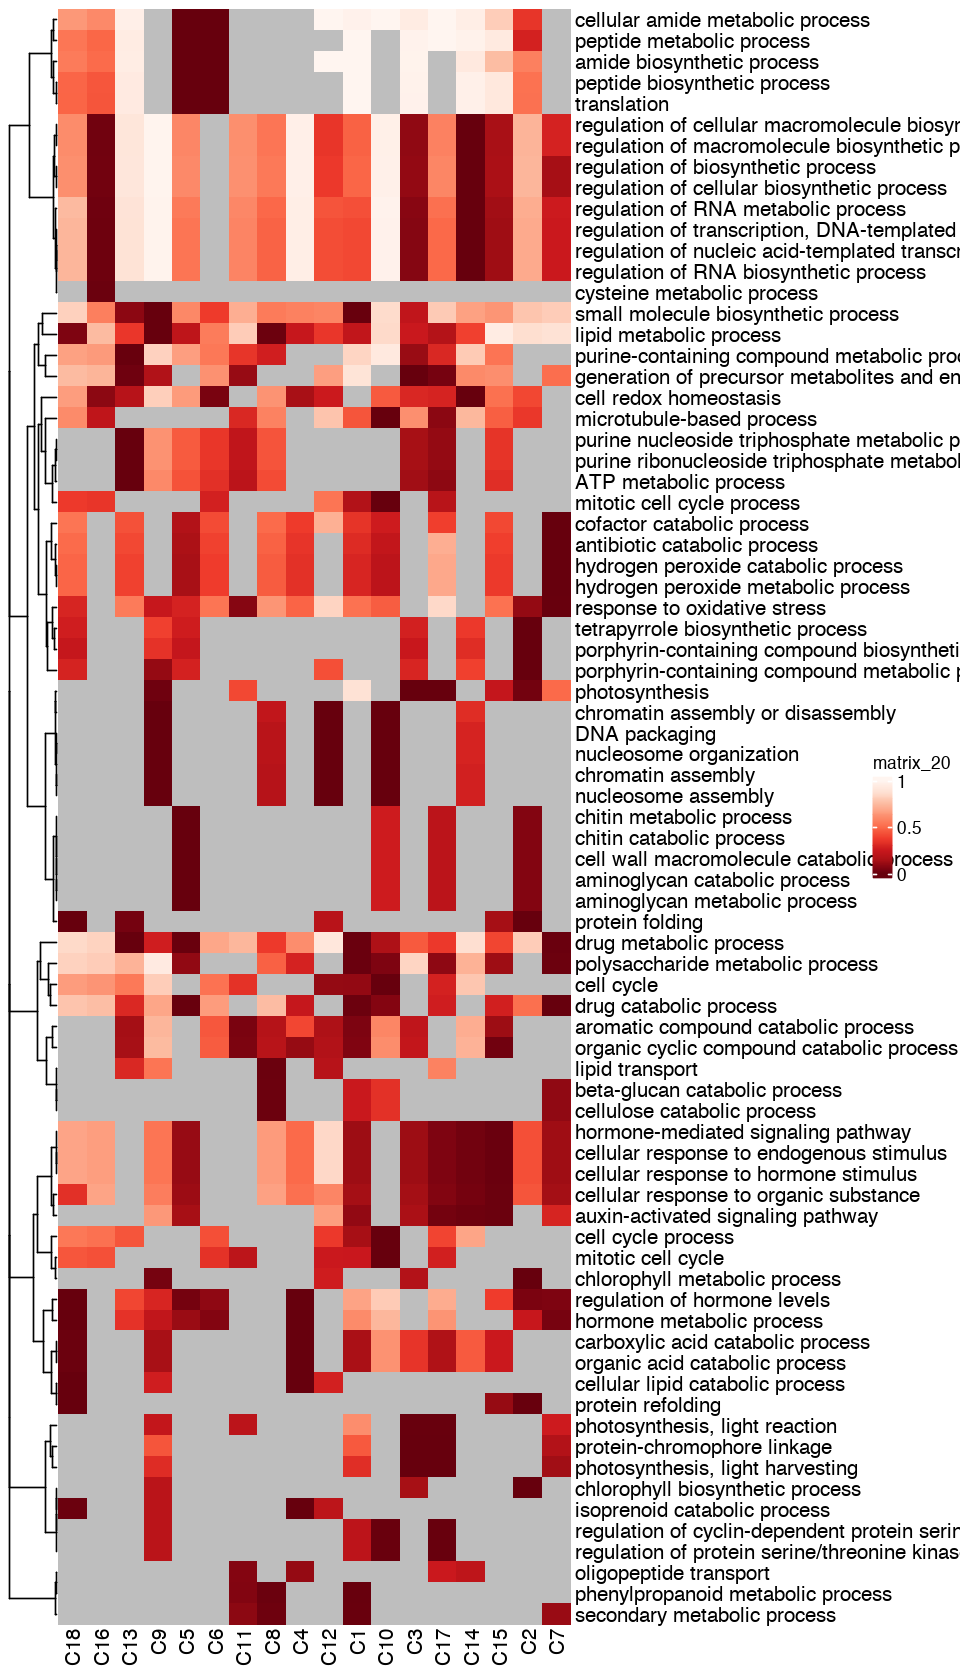

In [37]:
options(repr.plot.width=8, repr.plot.height=14)

#pdf(paste0(condition, "gene_cluster_function_heatmap.pdf"), width = 8, height = 14)

Heatmap(CC_cluster_gp, na_col = "grey", 
        cluster_columns=FALSE,
        #cluster_rows=FALSE,
        clustering_distance_columns=dist_no_na, 
        clustering_distance_rows=dist_no_na, 
        col=rev(brewer.pal(100,"Reds")))
        #col=brewer.pal(100,"Reds"))
#dev.off()


# DD cluster go function

In [38]:
DD_cluster_gp <- topGo2plot("DD")
DD_cluster_order <- c("C5", "C18", "C6", "C15", "C11", "C9", 
                      "C12", "C10", "C3", "C13", "C16", "C8", 
                      "C14", "C2", "C1", "C4", "C17", "C7")
DD_cluster_gp <- DD_cluster_gp[,DD_cluster_order]

Using pvalue as value column.  Use the value argument to cast to override this choice



Warning message in brewer.pal(100, "Reds"):
“n too large, allowed maximum for palette Reds is 9
Returning the palette you asked for with that many colors
”


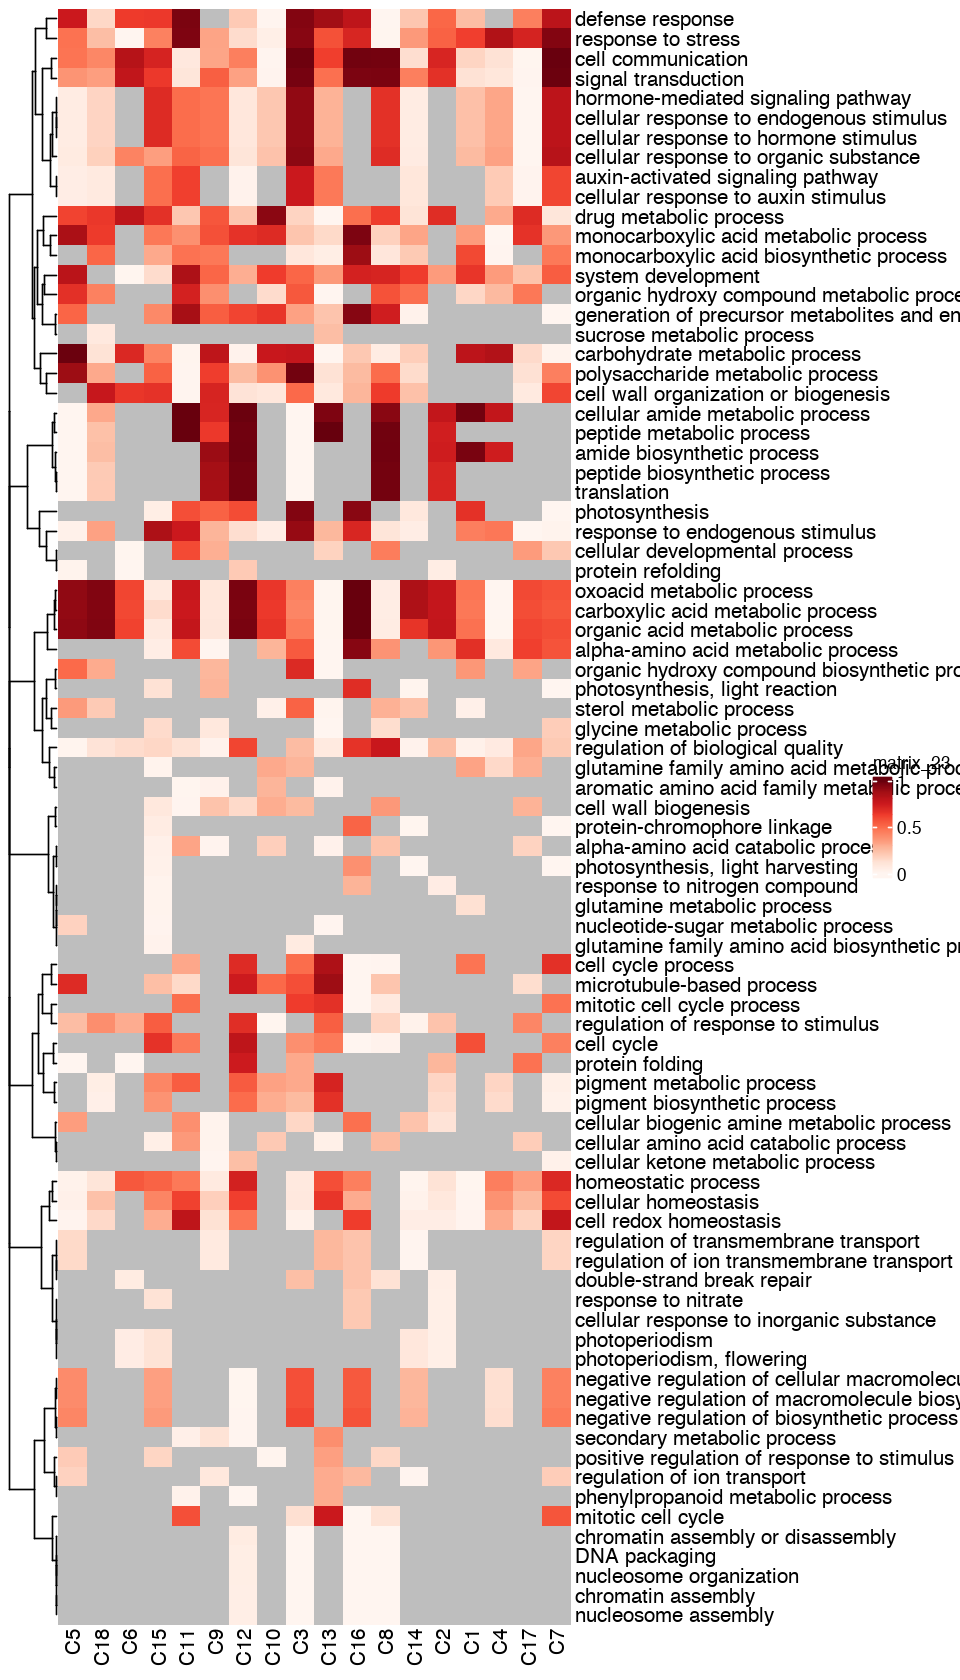

In [41]:
options(repr.plot.width=8, repr.plot.height=14)

#pdf(paste0("DDgene_cluster_function_heatmap.pdf"), width = 8, height = 14)

Heatmap(DD_cluster_gp, na_col = "grey", 
        cluster_columns=FALSE,
        #cluster_rows=FALSE,
        clustering_distance_columns=dist_no_na, 
        clustering_distance_rows=dist_no_na, 
        #col=rev(brewer.pal(100,"Reds")))
        col=brewer.pal(100,"Reds"))

#dev.off()


In [42]:
CC_FC_cluster_go <- readRDS(paste0("/Users/yuanzan/Documents/phd/tomato_metabolic/upsetR/CC_DD_DE_overlap/mfuzz_data/", "CC", "_FC_cluster_go_cluster18.rds"))


In [45]:
DD_FC_cluster_go <- readRDS(paste0("/Users/yuanzan/Documents/phd/tomato_metabolic/upsetR/CC_DD_DE_overlap/mfuzz_data/", "DD", "_FC_cluster_go_cluster18.rds"))
write.csv(DD_FC_cluster_go, "DD_FC_cluster_go_function.csv")